In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [59]:
from sklearn.datasets import make_regression

In [61]:
X,y = make_regression(n_samples = 1000 , n_features = 2, n_targets = 1, noise = 3.0)

In [62]:
X

array([[-0.57695968,  0.20087222],
       [-0.44850157, -0.09358918],
       [-0.379605  , -0.7335953 ],
       ...,
       [ 0.81257058,  0.63736118],
       [-0.6046016 ,  0.24498205],
       [-0.40811486, -0.91417658]])

In [63]:
y

array([-3.97245707e+01, -3.65386178e+01, -5.95335373e+01, -8.85228078e+01,
        6.80797613e+01,  5.38660255e+01, -8.57905116e+01,  3.14254901e+01,
       -8.67454420e+01,  9.14361140e+00, -2.25456495e+01, -1.05553677e+02,
       -2.24934233e+02, -1.21114545e+02, -1.00593722e+02, -4.79010916e+01,
        1.40494438e+02, -3.23171157e+01,  2.34997806e+01,  5.82500489e+01,
       -4.45417356e+01, -7.21866012e+01,  1.10126637e+02, -5.39636021e+01,
        9.51108662e+00,  4.04955001e+01,  4.32574056e+01,  1.02927690e+02,
       -1.29344217e+02, -1.03203483e+01, -8.40054579e+01, -3.01595497e+00,
       -8.36652923e+00,  1.13848264e+02, -5.36753718e+01, -6.39667974e+00,
        2.16457561e+02,  3.71377612e+01, -2.57675370e+01,  4.27003628e+01,
       -5.86294097e+01,  5.24615219e+01, -9.34694921e+01, -1.87861592e+02,
        7.73026605e+01,  1.07449774e+02,  3.39348619e+01, -7.97084349e+00,
       -1.44487632e+02, -6.88148536e+01,  1.01568852e+01,  1.98130501e+02,
       -2.12930876e+00,  

In [70]:
pd.DataFrame(X)[0]

0     -0.576960
1     -0.448502
2     -0.379605
3     -0.887570
4      0.588206
         ...   
995   -0.172005
996   -0.168250
997    0.812571
998   -0.604602
999   -0.408115
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

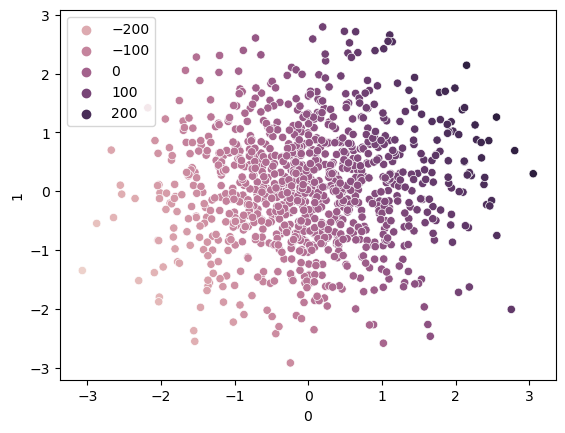

In [69]:
sns.scatterplot(x = pd.DataFrame(X)[0] , y = pd.DataFrame(X)[1] , hue = y)

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 42)

In [73]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape 

((670, 2), (330, 2), (670,), (330,))

In [74]:
from sklearn.svm import SVR

In [75]:
svr = SVR(kernel = 'linear')

In [76]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [77]:
svr.coef_

array([[81.79482942, 35.46376161]])

In [78]:
svr.intercept_

array([0.38124303])

In [81]:
y_pred = svr.predict(X_test)

In [82]:
y_pred

array([ 3.28629828e+01,  1.60942675e+01, -2.75677455e+01,  9.05316382e+01,
        2.12224848e+00,  1.12721521e+02,  4.78442847e+01, -5.75255328e+01,
       -1.54709462e+02,  6.76534038e+01,  6.41493389e+01,  5.33034364e+01,
       -1.60745321e+02, -2.34374819e+00,  2.55108738e+00,  4.58159040e+01,
        9.29823841e+00,  2.60434058e+02,  1.55784044e+02,  7.89784000e+01,
       -7.51892525e+01, -4.42163949e+01, -3.51346683e+01,  7.62259957e+01,
       -3.73083164e+01,  1.29686381e+02,  1.48639730e+02,  7.34309297e+01,
       -1.82444808e+00,  9.52891505e+01, -4.83155971e+01,  1.44427770e+02,
        2.76911041e+01,  9.52777055e+01,  7.14856712e+00,  3.49397593e+01,
       -6.58560156e+01,  1.61304999e+01, -5.16351916e+00,  6.82068567e+01,
       -1.07586376e+02, -1.96280246e+00,  1.61134542e+02,  3.06976476e+01,
        7.53650421e+01, -1.66646212e+01, -4.26735519e+01,  3.90307890e+01,
       -1.51739621e+02, -5.81488997e+01,  8.10817825e+01, -5.53735928e+01,
       -2.91605116e+01,  

In [83]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred)

In [84]:
score

0.9985692826155531

In [88]:
adjustedr2 = 1-(1-score)*(len(y_test)-1)/len(y_test )- X_test.shape[1]-1

In [89]:
adjustedr2

-2.0014263818772213

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
params = {
    'C':[1,10,100,1000,10000],
    'epsilon':[0.1,0.2,0.3],
    'gamma':[1,0.1,0.01,0.0001],
    'kernel':['linear','poly','rbf']
}

In [94]:
grid = GridSearchCV(svr,param_grid = params , refit = True , cv = 5,verbose =3)

In [100]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=1, kernel=linear;, score=0.999 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=1, kernel=poly;, score=0.680 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=1, kernel=poly;, score=0.767 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=1, kernel=poly;, score=0.791 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=1, kernel=poly;, score=0.735 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=1, kernel=poly;, score=0.762 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=1, kernel=rbf;, score=0.531 total time= 

GridSearchCV(cv=5, estimator=SVR(kernel='linear'),
             param_grid={'C': [1, 10, 100, 1000, 10000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']},
             verbose=3)

In [102]:
grid.best_params_

{'C': 10000, 'epsilon': 0.2, 'gamma': 0.01, 'kernel': 'rbf'}